In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from time import time
import sys
sys.path.append('../')
import dlp_lib
from dlp_lib import vectorize_sequences, timeit, run_model

dlp library loaded with tensorflow 2.1.0


In [2]:
(train_data, train_labels), (test_data, test_labels) =imdb.load_data(num_words=10000)

C:\Users\roblima\Anaconda3\envs\tf_no_gpu\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\roblima\Anaconda3\envs\tf_no_gpu\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
len(train_labels)

25000

In [5]:
len(test_data)

25000

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
len(imdb.get_word_index())

88584

In [8]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [9]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [11]:
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
len(decoded_review)

1113

In [13]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels ).astype('float32')

print (x_train.dtype, y_train.dtype)


float32 float32


In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 75us/sample - loss: 0.5284 - accuracy: 0.7761 - val_loss: 0.4058 - val_accuracy: 0.8544
Epoch 2/20
15000/15000 [==============================] - 0s 33us/sample - loss: 0.3174 - accuracy: 0.9015 - val_loss: 0.3073 - val_accuracy: 0.8886
Epoch 3/20
15000/15000 [==============================] - 0s 32us/sample - loss: 0.2319 - accuracy: 0.9238 - val_loss: 0.2804 - val_accuracy: 0.8909
Epoch 4/20
15000/15000 [==============================] - 0s 32us/sample - loss: 0.1779 - accuracy: 0.9436 - val_loss: 0.3043 - val_accuracy: 0.8761
Epoch 5/20
15000/15000 [==============================] - 0s 33us/sample - loss: 0.1445 - accuracy: 0.9533 - val_loss: 0.2783 - val_accuracy: 0.8884
Epoch 6/20
15000/15000 [==============================] - 0s 33us/sample - loss: 0.1169 - accuracy: 0.9636 - val_loss: 0.2947 - val_accuracy: 0.8853
Epoch 7/20
15000/15000 [==============================] 

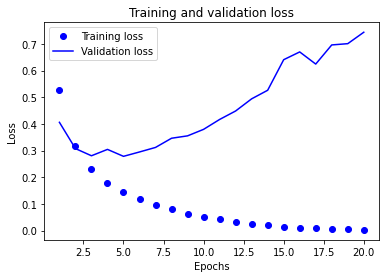

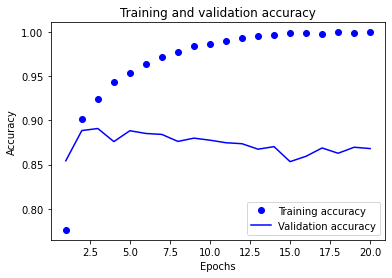

25000/25000 [==============================] - 1s 39us/sample - loss: 0.8075 - accuracy: 0.8516
Evaluation:  [0.8075392374646664, 0.85164] 1.002323865890503
Tests predict:  [[0.00783073]
 [1.        ]
 [0.9054358 ]
 ...
 [0.00210688]
 [0.00711473]
 [0.87110186]] 0.9205517768859863


(None, 12.848116636276245)

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

timeit(lambda: run_model(model, x_val, partial_x_train, y_val, partial_y_train, x_test, y_test))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 75us/sample - loss: 0.5215 - accuracy: 0.7835 - val_loss: 0.3869 - val_accuracy: 0.8691
Epoch 2/20
15000/15000 [==============================] - 1s 36us/sample - loss: 0.2988 - accuracy: 0.9024 - val_loss: 0.2978 - val_accuracy: 0.8870
Epoch 3/20
15000/15000 [==============================] - 1s 35us/sample - loss: 0.2116 - accuracy: 0.9319 - val_loss: 0.2743 - val_accuracy: 0.8907
Epoch 4/20
15000/15000 [==============================] - 1s 37us/sample - loss: 0.1617 - accuracy: 0.9471 - val_loss: 0.2766 - val_accuracy: 0.8899
Epoch 5/20
15000/15000 [==============================] - 1s 34us/sample - loss: 0.1291 - accuracy: 0.9597 - val_loss: 0.3367 - val_accuracy: 0.8714
Epoch 6/20
15000/15000 [==============================] - 1s 38us/sample - loss: 0.0980 - accuracy: 0.9709 - val_loss: 0.3190 - val_accuracy: 0.8824
Epoch 7/20
15000/15000 [==============================] 

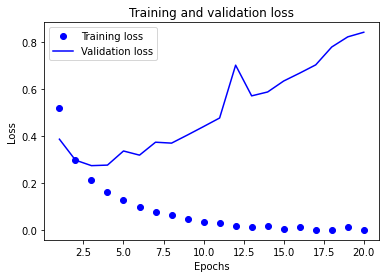

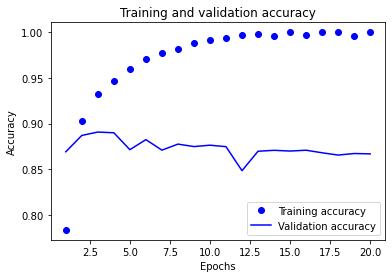

25000/25000 [==============================] - 1s 42us/sample - loss: 0.9215 - accuracy: 0.8524
Evaluation:  [0.921490611846447, 0.85244] 1.0792789459228516
Tests predict:  [[0.00209581]
 [1.        ]
 [0.97744054]
 ...
 [0.00113884]
 [0.00196834]
 [0.41434732]] 0.8597044944763184


(None, 13.348037004470825)

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

timeit(lambda: run_model(model, x_val, partial_x_train, y_val, partial_y_train, x_test, y_test))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 83us/sample - loss: 0.4701 - accuracy: 0.8013 - val_loss: 0.3375 - val_accuracy: 0.8797
Epoch 2/20
15000/15000 [==============================] - 1s 41us/sample - loss: 0.2663 - accuracy: 0.9073 - val_loss: 0.3070 - val_accuracy: 0.8789
Epoch 3/20
15000/15000 [==============================] - 1s 41us/sample - loss: 0.1953 - accuracy: 0.9343 - val_loss: 0.3235 - val_accuracy: 0.8681
Epoch 4/20
15000/15000 [==============================] - 1s 39us/sample - loss: 0.1571 - accuracy: 0.9458 - val_loss: 0.3010 - val_accuracy: 0.8830
Epoch 5/20
15000/15000 [==============================] - 1s 39us/sample - loss: 0.1244 - accuracy: 0.9595 - val_loss: 0.2939 - val_accuracy: 0.8848
Epoch 6/20
15000/15000 [==============================] - 1s 39us/sample - loss: 0.1006 - accuracy: 0.9669 - val_loss: 0.3367 - val_accuracy: 0.8768
Epoch 7/20
15000/15000 [==============================] 

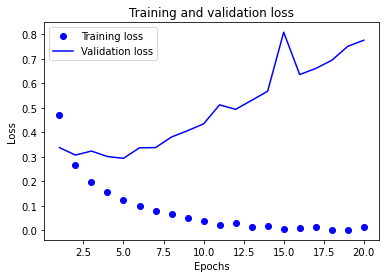

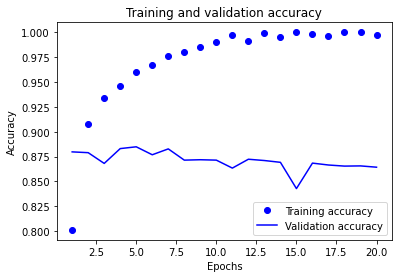

25000/25000 [==============================] - 1s 43us/sample - loss: 0.8520 - accuracy: 0.8500s - loss: 0.8539 - accura
Evaluation:  [0.8520422636163235, 0.85004] 1.095076322555542
Tests predict:  [[7.1060768e-04]
 [1.0000000e+00]
 [9.9700803e-01]
 ...
 [4.5493263e-04]
 [4.9270345e-03]
 [9.3624580e-01]] 1.021397590637207


(None, 14.951200485229492)

In [17]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

timeit(lambda: run_model(model, x_val, partial_x_train, y_val, partial_y_train, x_test, y_test))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 63us/sample - loss: 0.1652 - accuracy: 0.7928 - val_loss: 0.1143 - val_accuracy: 0.8725
Epoch 2/20
15000/15000 [==============================] - 1s 33us/sample - loss: 0.0881 - accuracy: 0.9044 - val_loss: 0.0949 - val_accuracy: 0.8830
Epoch 3/20
15000/15000 [==============================] - 1s 34us/sample - loss: 0.0633 - accuracy: 0.9303 - val_loss: 0.0863 - val_accuracy: 0.8895
Epoch 4/20
15000/15000 [==============================] - 1s 35us/sample - loss: 0.0490 - accuracy: 0.9479 - val_loss: 0.0852 - val_accuracy: 0.8854
Epoch 5/20
15000/15000 [==============================] - 1s 37us/sample - loss: 0.0404 - accuracy: 0.9583 - val_loss: 0.0906 - val_accuracy: 0.8774
Epoch 6/20
15000/15000 [==============================] - 1s 33us/sample - loss: 0.0325 - accuracy: 0.9680 - val_loss: 0.0927 - val_accuracy: 0.8748
Epoch 7/20
15000/15000 [==============================] 

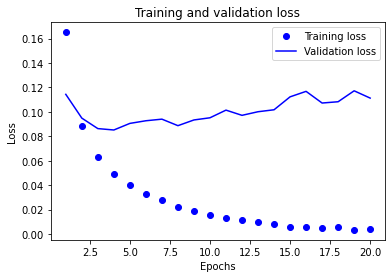

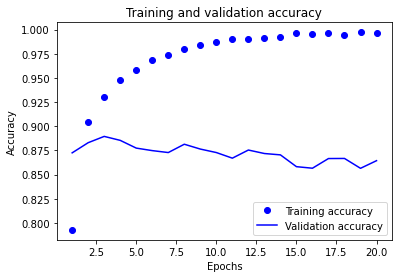

25000/25000 [==============================] - 1s 38us/sample - loss: 0.1222 - accuracy: 0.8518
Evaluation:  [0.1221505783700943, 0.8518] 0.9913206100463867
Tests predict:  [[0.01962121]
 [0.99999726]
 [0.9465623 ]
 ...
 [0.01945072]
 [0.08894373]
 [0.7150175 ]] 0.8896441459655762


(None, 12.805823802947998)

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

timeit(lambda: run_model(model, x_val, partial_x_train, y_val, partial_y_train, x_test, y_test))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 73us/sample - loss: 0.4908 - accuracy: 0.7962 - val_loss: 0.3886 - val_accuracy: 0.8492
Epoch 2/20
15000/15000 [==============================] - 1s 34us/sample - loss: 0.2844 - accuracy: 0.9079 - val_loss: 0.3093 - val_accuracy: 0.8782
Epoch 3/20
15000/15000 [==============================] - 0s 33us/sample - loss: 0.2036 - accuracy: 0.9326 - val_loss: 0.2699 - val_accuracy: 0.8901
Epoch 4/20
15000/15000 [==============================] - 0s 33us/sample - loss: 0.1497 - accuracy: 0.9528 - val_loss: 0.2740 - val_accuracy: 0.8881
Epoch 5/20
15000/15000 [==============================] - 0s 33us/sample - loss: 0.1166 - accuracy: 0.9647 - val_loss: 0.2952 - val_accuracy: 0.8857
Epoch 6/20
15000/15000 [==============================] - 0s 32us/sample - loss: 0.0956 - accuracy: 0.9688 - val_loss: 0.3203 - val_accuracy: 0.8801
Epoch 7/20
15000/15000 [==============================] 

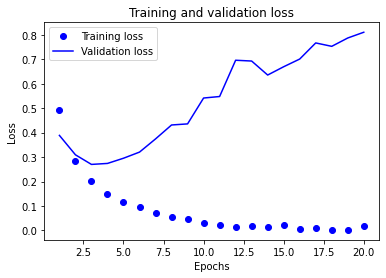

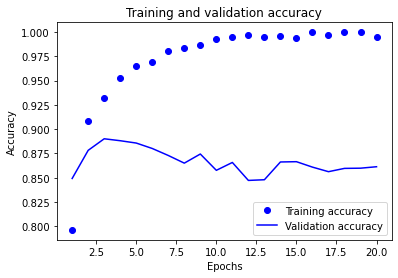

25000/25000 [==============================] - 1s 42us/sample - loss: 0.9106 - accuracy: 0.8456
Evaluation:  [0.9106072042965889, 0.84564] 1.0691144466400146
Tests predict:  [[5.0087314e-04]
 [9.9994028e-01]
 [9.6948111e-01]
 ...
 [1.3907757e-04]
 [1.9431297e-02]
 [3.0726093e-01]] 0.9195446968078613


(None, 12.740953922271729)

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

timeit(lambda: run_model(model, x_val, partial_x_train, y_val, partial_y_train, x_test, y_test))